<a href="https://colab.research.google.com/github/Raunyweb/Raunyedits/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/spotify.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Data Pre-Processing

Check missing values

In [ ]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


Drop unnecessary columns

In [ ]:
df = df.drop(['track_id', 'track_name', 'track_artist'], axis=1, errors='ignore')

Encode categorical features

In [ ]:
df['playlist_genre'] = df['playlist_genre'].astype('category').cat.codes
df['playlist_name'] = df['playlist_name'].astype('category').cat.codes

Featuring scales

In [ ]:
df['playlist_subgenre'] = df['playlist_subgenre'].astype('category').cat.codes
df_numeric = df.drop(columns=['track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id'], errors='ignore')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)

Exploratory Data Analysis & Visualizations

Distribution Plot

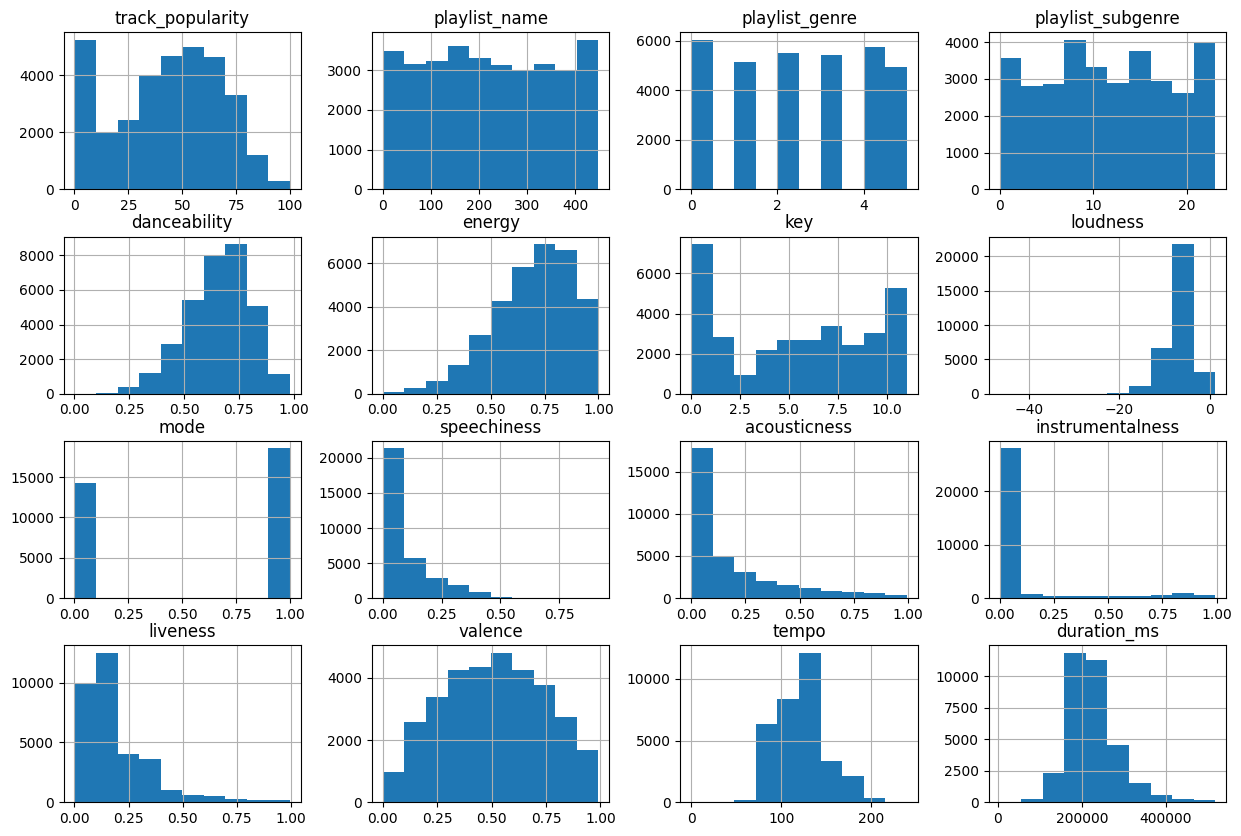

In [ ]:
df.hist(figsize=(15,10))
plt.show()

Boxplot(Outlier Detection)

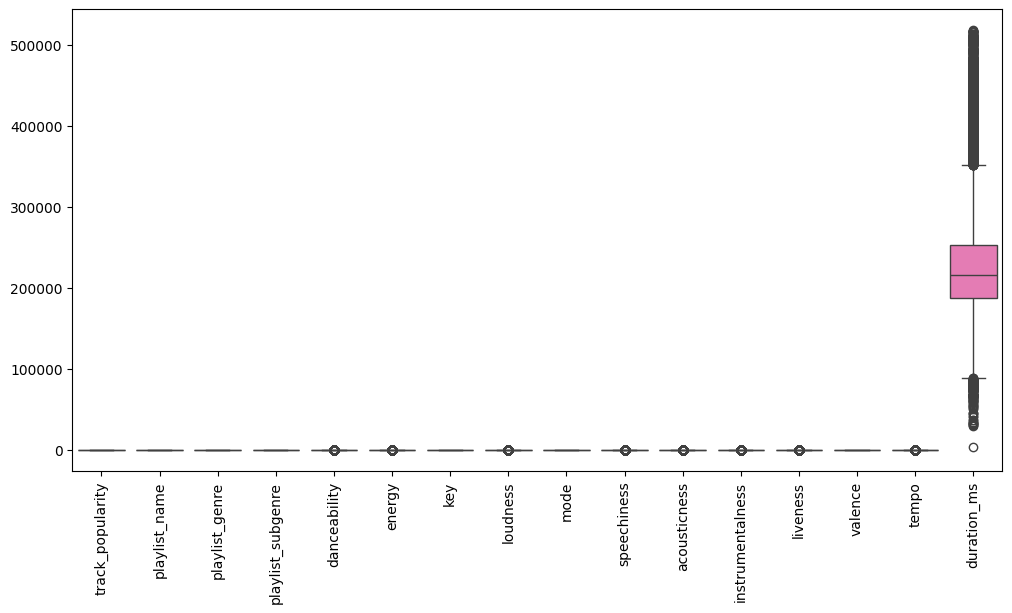

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Correlation Matrix

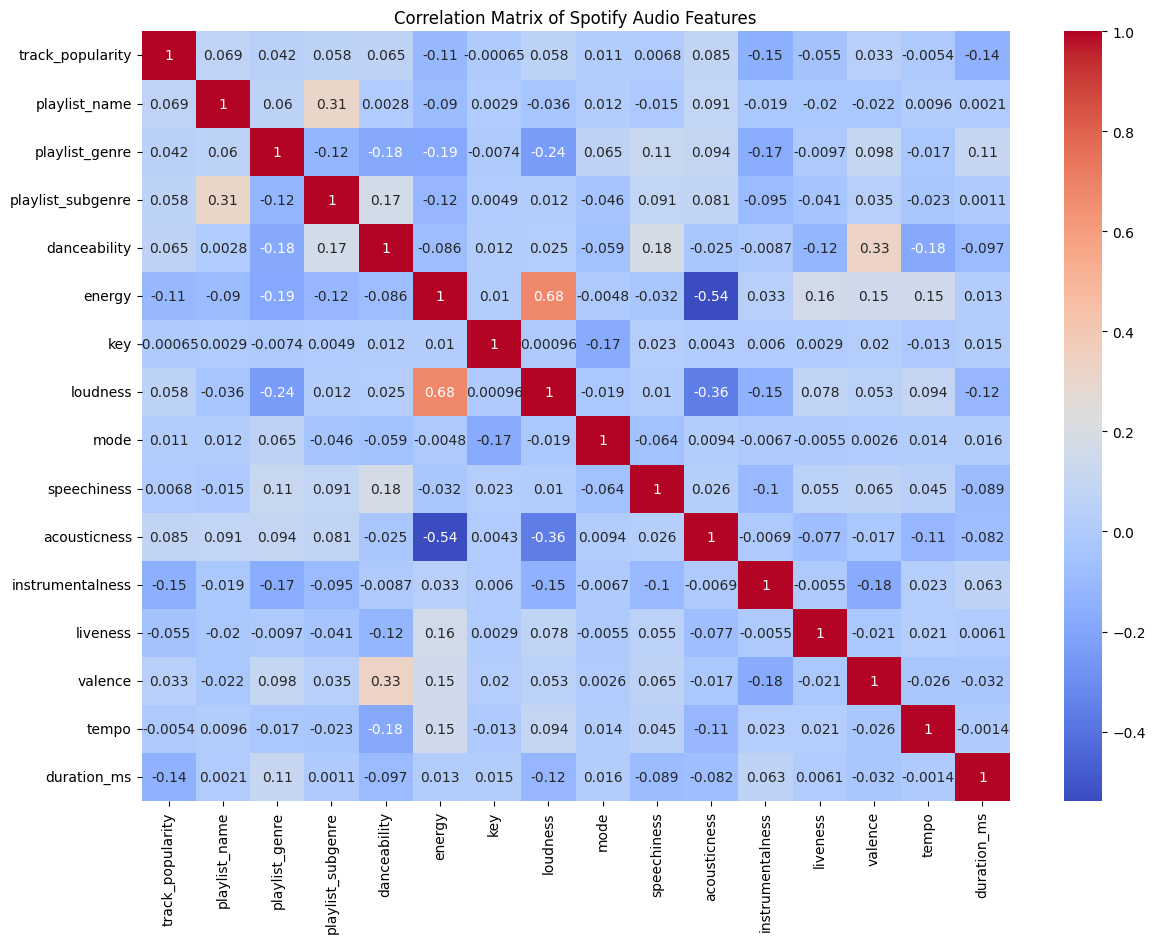

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Spotify Audio Features")
plt.show()

Finding Optimal Number of Clusters (Elbow Method)

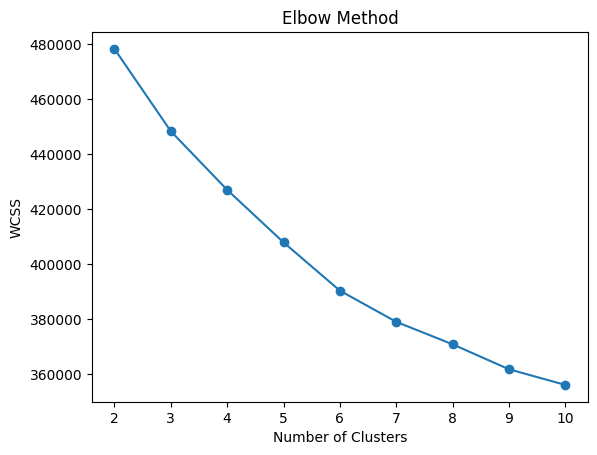

In [ ]:
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

Silhouette Score

In [ ]:
score = silhouette_score(scaled_features, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.07949258378539552


Cluster Visualization using PCA

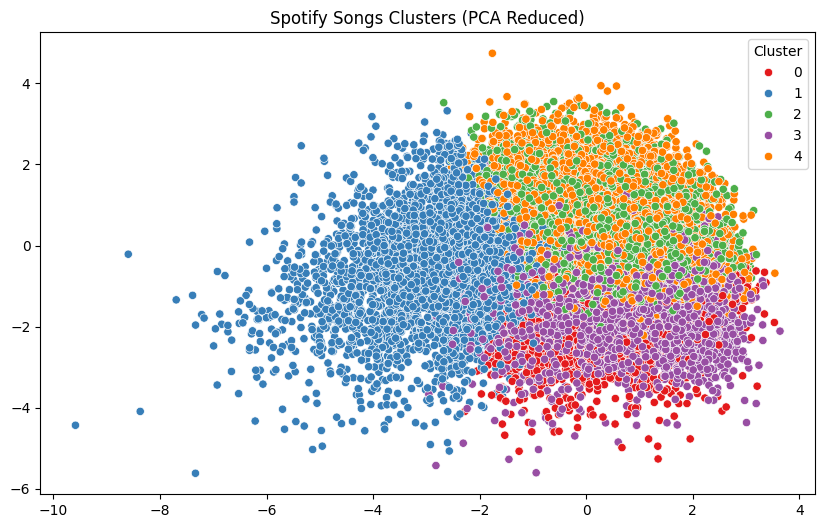

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='Set1')
plt.title("Spotify Songs Clusters (PCA Reduced)")
plt.show()

Clusters vs Playlist Genre

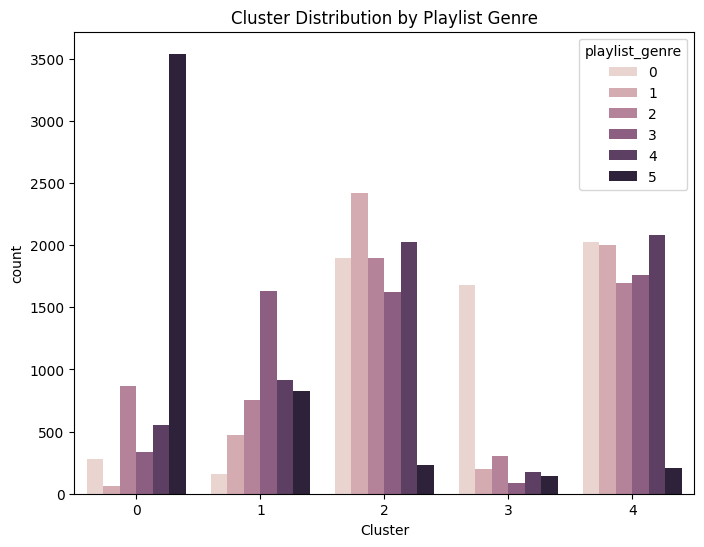

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Cluster', hue='playlist_genre', data=df)
plt.title("Cluster Distribution by Playlist Genre")
plt.show()

Clusters vs Playlist Name

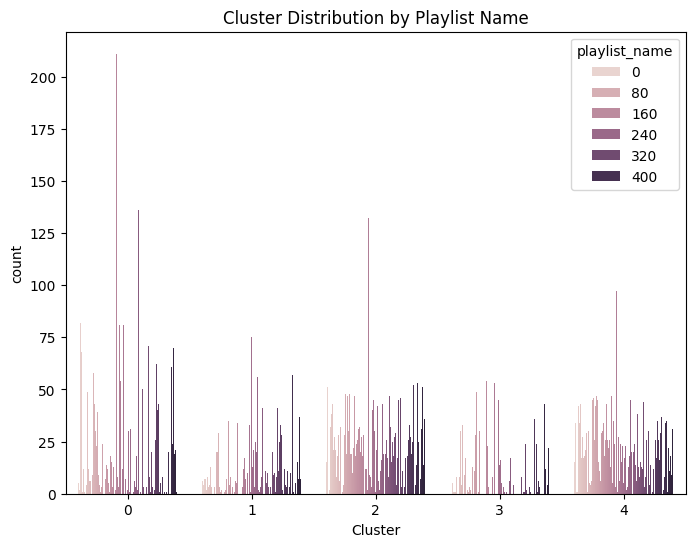

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Cluster', hue='playlist_name', data=df)
plt.title("Cluster Distribution by Playlist Name")
plt.show()

Recommendation Logic (Core Part)

In [ ]:
def recommend_songs(song_index):
    cluster = df.iloc[song_index]['Cluster']
    return df[df['Cluster'] == cluster].sample(5)

recommend_songs(10)


,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
30690,77,6gkwOLmk0ALMOjWs5WhAEr,In My Own Words,01-01-2006,6,6UJw1egIcZVfrBmcKs5uHH,0,16,0.452,0.574,...,-8.336,1,0.3100,0.2460,0.000000,0.1890,0.580,92.791,207187,2
19499,82,3RWeME5ryDw9wxO99OoDgP,Bellaquita,06-09-2019,372,4csIMGPI3aGo3Xy7WG8jBi,1,19,0.584,0.698,...,-3.961,1,0.1060,0.0900,0.000069,0.1710,0.765,166.047,204787,2
24202,46,1yoA6HcbdX23c4k0MXNq5g,Tony! Toni! Tone'! Greatest Hits,01-01-1997,261,4sji14lrB5bgcr51lPALYH,3,14,0.714,0.507,...,-8.481,1,0.0437,0.2740,0.000000,0.0377,0.850,79.871,296307,2
463,65,1HwIUaaEuRsxsIyssqtGLH,SQUARE UP,15-06-2018,203,37i9dQZF1DX4RDXswvP6Mj,2,3,0.600,0.960,...,-1.807,1,0.0950,0.0426,0.000000,0.0882,0.503,109.863,237077,2
19237,79,4BvD9caT3ZohqNQFcR8dVD,Ahora,31-05-2019,403,0T47pLnihK4xB8Bk9IQ0Dv,1,19,0.678,0.806,...,-3.334,1,0.0648,0.0464,0.000000,0.0673,0.614,183.984,227480,2
